# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

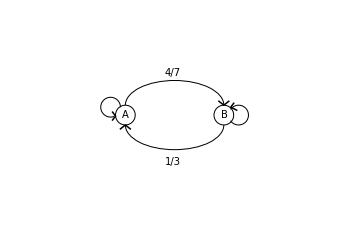

In [ ]:
#@markdown Máquina de estados de un proceso hipotético
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

**Solución:**

Definimos los estados
* **A**=0,
* **B**=1,

entonces los pasos correspondientes a cada estado, resultan
* Partiendo de **A**: +1 con probabilidad de 4/7 y +0 con probabilidad de 3/7.
* Partiendo de **B**: -1 con probabilidad de 1/3 y +0 con probabilidad de 2/3.

In [5]:
def proceso():
  E=0 # El proceso inicia en el estado A
  for operacion in range(50):
    if E==0:
      paso=np.random.choice([1,0],p=[4/7,3/7])
    else:
      paso=np.random.choice([-1,0],p=[1/3,2/3])
    E=E+paso
  return E

In [15]:
proceso()

1

In [16]:
# Simulación Montecarlo
estados=[]
for n in range(10**5):
  estados.append(proceso())

B=1 # Estado de interes
bernoulli=np.array(estados)==B
probabilidad_B=bernoulli.mean()
probabilidad_B

0.63564

**Respuesta:**
Usando simulación Montecarlo con 100000 escenarios se determina que, la probabilidad de que el proceso termine en el estado **B** es 63.56%.

---
## Problema 2. Evaluación numérica de integrales utilizando Montecarlo
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

* Defina la función para resolver el área con el método 2 visto en clase

In [18]:
def region(x,y):
  return x**2+2*y**2<=-2*x+8*y-7

def montecarlo2(bernoulli,xmin,xmax,ymin,ymax,N):
  ux=np.random.uniform(xmin,xmax,N)
  uy=np.random.uniform(ymin,ymax,N)
  B=bernoulli(ux,uy)
  th=B.mean()
  AR=(xmax-xmin)*(ymax-ymin)
  return AR*th,np.sqrt((1-th)/(th*N))

* Encontrar el área con el número de términos deseados

In [ ]:
# Búsqueda de límites
xmin,xmax=-2.5,0.5 # -3,1  #-5,5
ymin,ymax=0.9,3    # 1,3   #-5,5

x=np.linspace(xmin,xmax,300)
y=np.linspace(ymin,ymax,300)
X,Y=np.meshgrid(x,y)
plt.scatter(X,Y,c=region(X,Y),cmap='Greys')
plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin],'r')
plt.grid()

In [31]:
terminos=np.logspace(1,5,5).astype('int')
tabla=pd.DataFrame(index=terminos,columns=['Integral','Error'])

for N in terminos:
  tabla.loc[N]=montecarlo2(region,xmin,xmax,ymin,ymax,N)
tabla

,Integral,Error
10,3.78,0.258199
100,4.41,0.065465
1000,4.3344,0.021295
10000,4.48497,0.006362
100000,4.436775,0.002049


---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2021 para ver si el análisis concuerda.

In [ ]:
!pip install yfinance

In [33]:
import yfinance as yf

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2020 y muestre sus gráficas.

Calcule los rendimientos diarios junto con sus características estadísticas

Simule 1000 escenarios de rendimientos diarios para el 2021 (para cada una de las empresas)

Calcule los precios con base en los rendimientos simulados

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

Finalmente, grafique los datos reales del 2021 para ver que tan acertado fue nuestro análisis.